In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from scipy.spatial import cKDTree
from sklearn.datasets import make_blobs

In [131]:
X, y = make_blobs(n_samples=300, centers=3, random_state=0, cluster_std=0.4)

ix = np.argsort(y)
X = X[ix]
y = y[ix]

Numero de clusters:  4
Numero de ruidos:  18


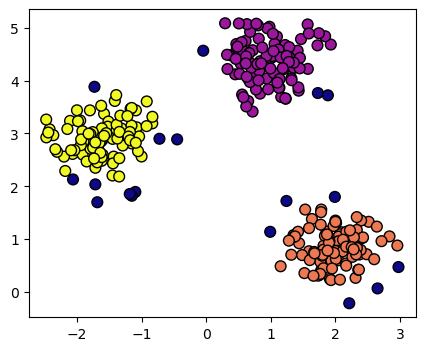

In [132]:
dbscan = DBSCAN(eps=0.3, min_samples=5).fit(X)
labels = dbscan.labels_
print("Numero de clusters: ", len(np.unique(labels)))
print("Numero de ruidos: ", np.sum(labels == -1))

plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="plasma", s=60, edgecolors="black")
plt.show()

Numero de clusters:  3
Numero de ruidos:  0


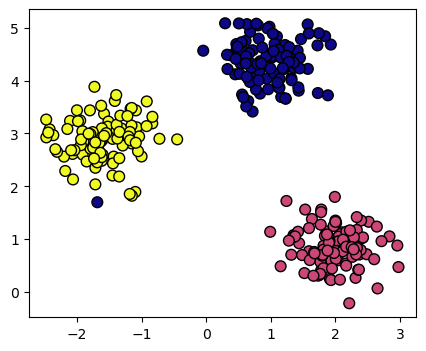

In [133]:
noise_index = np.where(labels == -1)[0]
non_noise_index = np.where(labels != -1)[0]
noise_points = X[noise_index]
non_noise_points = X[non_noise_index]

tree = cKDTree(non_noise_points)
ind = tree.query_ball_point(noise_points, r=0.5)

for it, item in enumerate(ind):
    neighbors = non_noise_index[item]
    if len(neighbors) > 0:
        new_label = np.bincount(y[neighbors]).argmax()
        labels[noise_index[it]] = new_label
    else:
        labels[noise_index[it]] = 0

print("Numero de clusters: ", len(np.unique(labels)))
print("Numero de ruidos: ", np.sum(labels == -1))

plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="plasma", s=60, edgecolors="black")
plt.show()